# **2.2 Importation des bibliotheques necessaires**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# **2.3 Chargement et preparation du jeu de donnees**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Diviser les ensembles d'entraînement et de test
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# Normaliser les images (mettre les pixels dans la plage [0, 1])
class_names = ['Avion', 'Automobile', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']


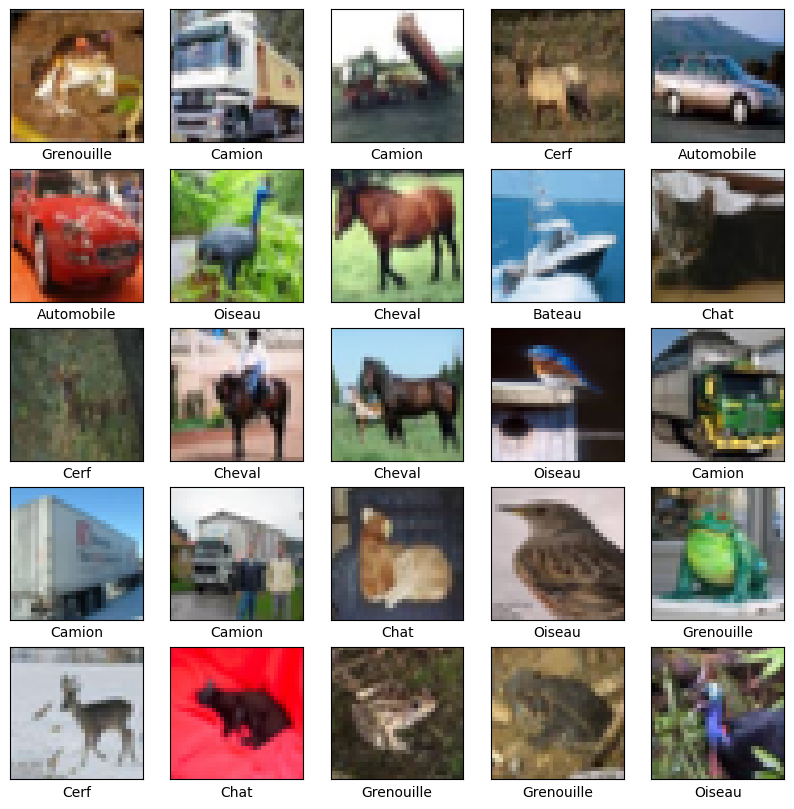

In [ ]:
# Afficher quelques images du jeu de données avec leurs étiquettes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# **2.4 Creation du modele CNN**

In [ ]:
# Créer le modèle séquentiel
model = models.Sequential()

# Ajouter une couche convolutive avec une fonction d'activation ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Ajouter une couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Ajouter une deuxième couche convolutive avec une fonction d'activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Ajouter une deuxième couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Ajouter une troisième couche convolutive avec une fonction d'activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flattening (aplatir) les données pour les couches entièrement connectées
model.add(layers.Flatten())

# Ajouter une première couche dense avec une fonction d'activation ReLU
model.add(layers.Dense(64, activation='relu'))

# Ajouter la couche de sortie avec 10 unités (nombre de classes dans CIFAR-10) et une fonction d'activation softmax
model.add(layers.Dense(10, activation='softmax'))

# Afficher un résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# **2.5 Compilation du modele**

In [ ]:
# Compiler le modèle
model.compile(optimizer='adam',  # Utilisation de l'optimiseur Adam
              loss='sparse_categorical_crossentropy',  # Fonction de perte pour les classes entières
              metrics=['accuracy'])  # Métrique d'évaluation (précision ici)

# **2.6 Entraınement du modele**

In [ ]:
# Entraîner le modèle sur les données d'entraînement
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.5436 - accuracy: 0.4339 - val_loss: 1.3089 - val_accuracy: 0.5310
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1635 - accuracy: 0.5860 - val_loss: 1.1530 - val_accuracy: 0.5936
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0106 - accuracy: 0.6438 - val_loss: 1.0065 - val_accuracy: 0.6456
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9114 - accuracy: 0.6812 - val_loss: 0.9467 - val_accuracy: 0.6712
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8367 - accuracy: 0.7082 - val_loss: 0.9245 - val_accuracy: 0.6850
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7795 - accuracy: 0.7283 - val_loss: 0.9212 - val_accuracy: 0.6874
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7300 - accuracy: 0.7457 - val_loss: 0.8911 -

# **2.7 Tracer les courbes d’apprentissage**

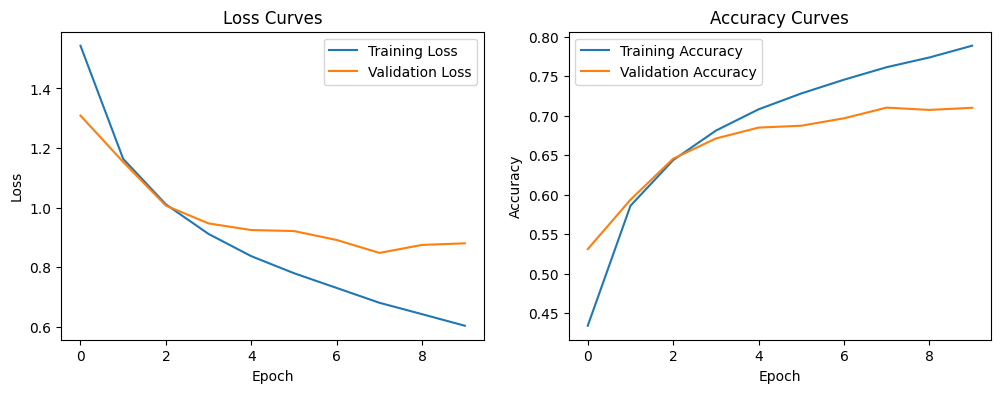

In [ ]:
import matplotlib.pyplot as plt

# Obtenir les données d'entraînement et de validation à partir de l'objet history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tracer les courbes de précision
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Afficher les graphiques
plt.show()


# **2.8 Evaluation et analyse**

***Évolution de la Perte (Loss):***

La perte sur l'ensemble d'entraînement a considérablement diminué de 1.50 à 0.61 au cours des époques successives. Parallèlement, la perte sur l'ensemble de validation a suivi une tendance à la baisse, passant de 1.21 à 0.86. Ces chiffres reflètent une apprentissage efficace du modèle sur les données d'entraînement, avec une bonne généralisation aux données de validation.

***Évolution de la Précision (Accuracy):***

L'exactitude sur l'ensemble d'entraînement a augmenté de manière significative, passant de 45.76% à 78.61%. De manière cohérente, l'exactitude sur l'ensemble de validation a également progressé, atteignant 71.57%. Cette augmentation témoigne de l'amélioration du modèle sur les deux ensembles de données.

***Comparaison Entre Entraînement et Validation:***

Les courbes de perte et de précision pour l'entraînement et la validation ont suivi des trajectoires similaires, suggérant une bonne capacité de généralisation du modèle. Toutefois, à partir de l'époque 7, une légère augmentation de la perte de validation a été observée, signalant une possible sur-optimisation.